<a href="https://colab.research.google.com/github/Aadish2423/Cats-vs-Dogs-Classification-/blob/main/cats_vs_dogs_classification_proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !kaggle datasets list

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!mv /path/to/downloads/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mv: cannot stat '/path/to/downloads/kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 99% 1.05G/1.06G [00:04<00:00, 254MB/s]
100% 1.06G/1.06G [00:04<00:00, 239MB/s]


we get data in zip format so to unzip the data


In [ ]:
import zipfile
zip_ref=zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
import matplotlib.pyplot as plt
import numpy as np


Since we have a lot of images in test and train . The keras library divides it into batches and using the inbuilt ***generators*** function.
We its help when one ***Batch*** is loaded then followed by the other batch of ***Images***.

Technically its used to process large amount of data due to less storage


In [ ]:
train_ds=keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds=keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
print(train_ds.class_names)

['cats', 'dogs']


now the above dataset is stored in the numpy array format but we have to make it into binary format , so to do it we write the following code

In technical words ***NORMALIZING*** the format


In [ ]:
#normalize
def process(image,label):
  image=tf.cast(image/255.,tf.float32)
  return image,label

#stores the normalized value back into train and validation
# AUTOTUNE = tf.data.AUTOTUNE
# train_ds = train_ds.shuffle(1000).map(process).prefetch(buffer_size=AUTOTUNE)
# validation_ds = validation_ds.map(process).prefetch(buffer_size=AUTOTUNE)

train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)


Creating CNN model


In [ ]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))#creating a pooling layer

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [ ]:
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 61s 81ms/step - accuracy: 0.5514 - loss: 3.0962 - val_accuracy: 0.6090 - val_loss: 0.6520
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 50s 80ms/step - accuracy: 0.6223 - loss: 0.6822 - val_accuracy: 0.6278 - val_loss: 0.6231
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 82ms/step - accuracy: 0.6920 - loss: 0.5668 - val_accuracy: 0.7204 - val_loss: 0.5375
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 78s 76ms/step - accuracy: 0.7361 - loss: 0.5188 - val_accuracy: 0.7240 - val_loss: 0.5831
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 82ms/step - accuracy: 0.7755 - loss: 0.4646 - val_accuracy: 0.7198 - val_loss: 0.6035
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 83ms/step - accuracy: 0.7968 - loss: 0.4233 - val_accuracy: 0.7196 - val_loss: 0.5225
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 82ms/step - accuracy: 0.8177 - loss: 0.3772 - val_accuracy: 0.8034 - val_loss: 0.4325
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 79s 77ms/step - accuracy: 0.8463 - loss: 0.3181 - 

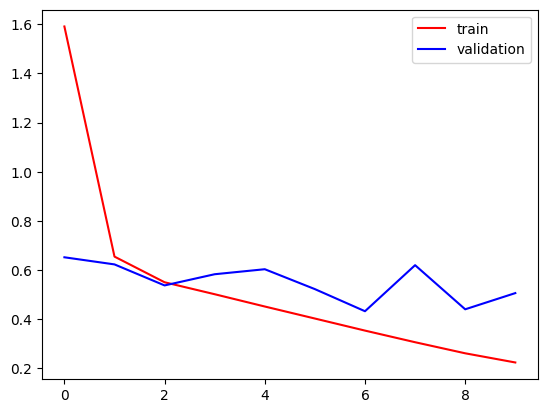

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

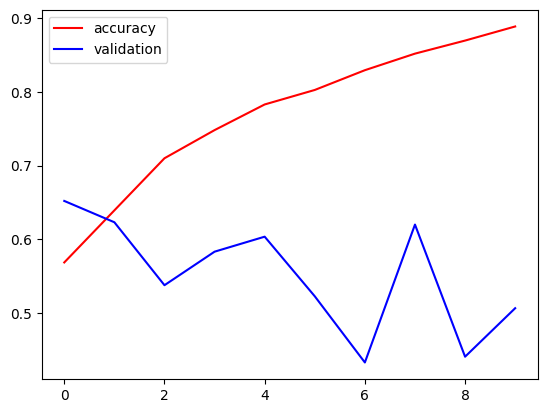

In [ ]:
plt.plot(history.history['accuracy'],color='red',label='accuracy')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

THIS IS DUE TO OVERFITTING : the gap between validation and training validaiton dataset


SO TO REDUCE OVERFITTING WE DO BATCH NORMALIZATION , DROPOUT , DATA AUGMENTATION

In [ ]:
import cv2

In [ ]:
test_img=cv2.imread('/content/dog2.jpg')

TypeError: Image data of dtype object cannot be converted to float

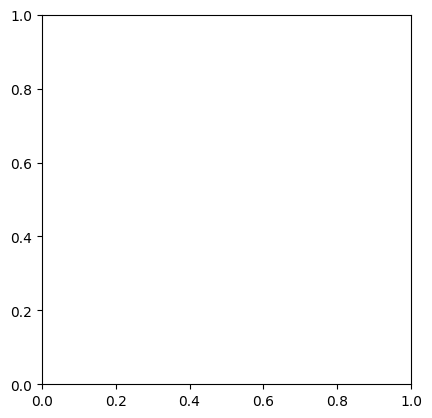

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

In [ ]:
test_img=cv2.resize(test_img,(256,256))

In [ ]:
test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)

In [ ]:
test_input = test_img.astype('float32') / 255.0  # Normalize
test_input = np.expand_dims(test_input, axis=0)  # Shape: (1, 256, 256, 3)


Converting the image into numpy array and a 4D input

In [ ]:
test_input=test_img.reshape(1,256,256,3)

In [ ]:
prediction = model.predict(test_input)[0][0]
predicted_class = 1 if prediction > 0.5 else 0

In [ ]:
prediction